In [7]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

import json
import numpy as np
# # Serializing json
# json_object = json.dumps(super_dict, indent=4)
 
# # Writing to sample.json
# with open("aif_compare.json", "w") as outfile:
#     outfile.write(json_object)

# Opening JSON file
with open('aif_compare.json', 'r') as openfile:
    # Reading from json file
    aif_compare = json.load(openfile)

In [8]:
# Define plotting parameters
%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

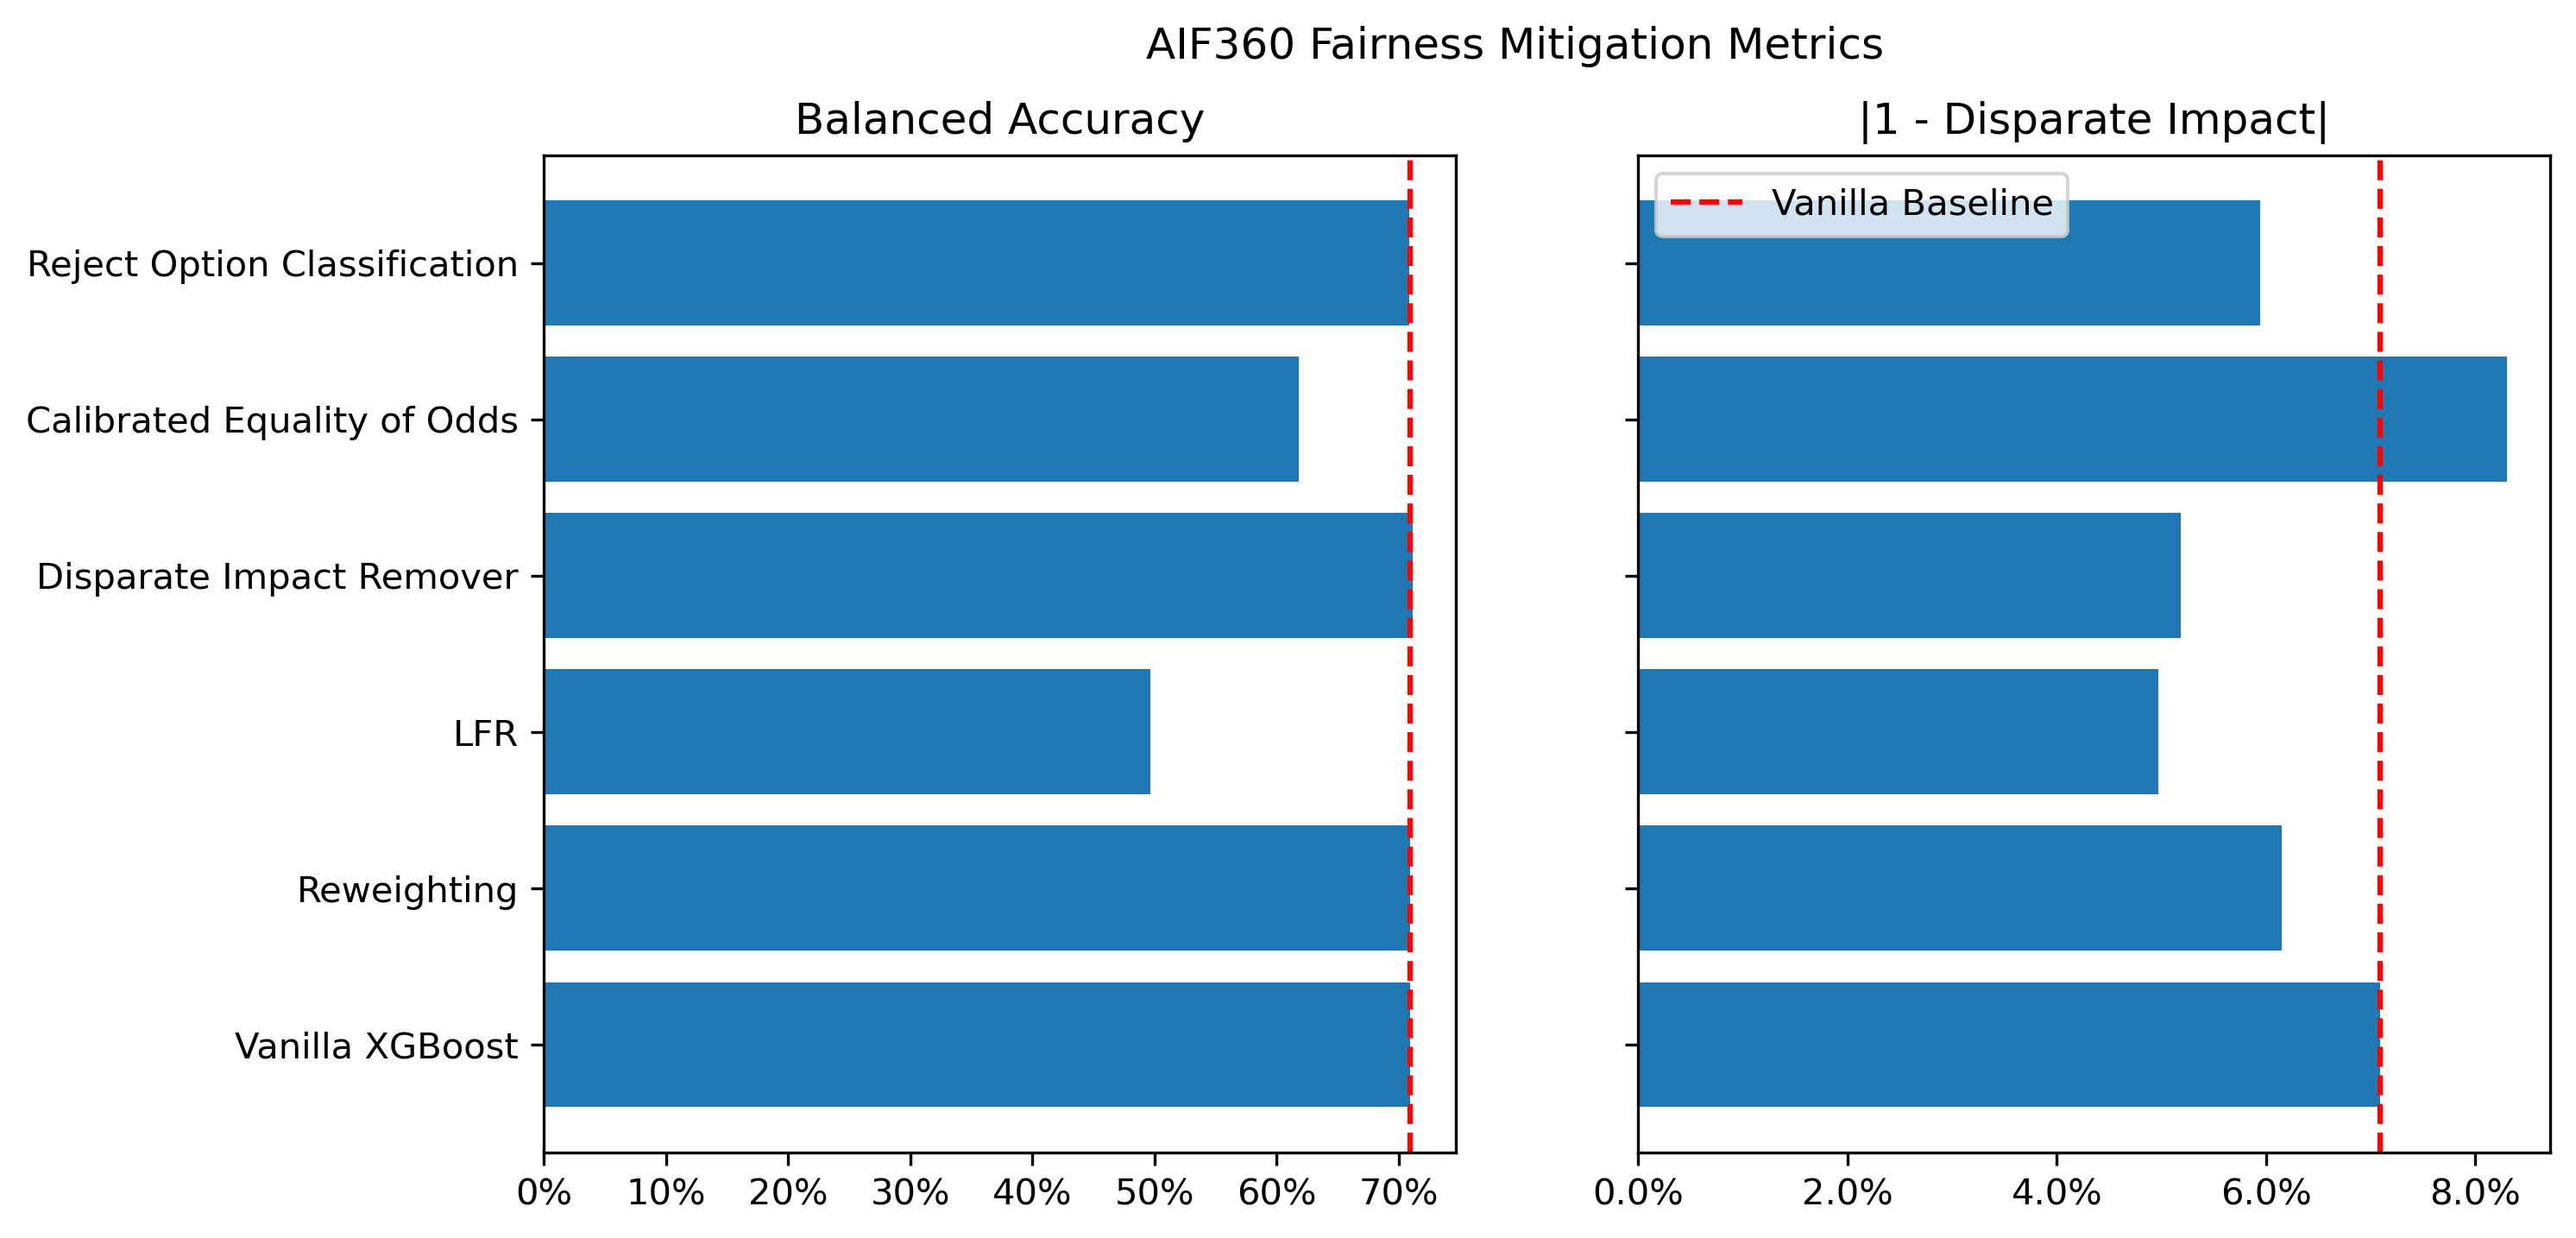

In [9]:
fig, axes = plt.subplots(1,2,figsize = (10,5), sharey = True)
axes[0].barh(np.arange(len(aif_compare["name"])), np.array(aif_compare["balanced accuracy"]) * 100)
axes[0].set_yticks(np.arange(len(aif_compare["name"])), labels=aif_compare["name"])
axes[0].axvline(x = aif_compare["balanced accuracy"][0] * 100, linestyle = "dashed", c = "red")
axes[0].xaxis.set_major_formatter(mtick.PercentFormatter())
axes[0].set_title("Balanced Accuracy")
axes[1].barh(np.arange(len(aif_compare["name"])), np.abs(1 - np.array(aif_compare["disparate impact"])) * 100)
axes[1].set_yticks(np.arange(len(aif_compare["name"])), labels=aif_compare["name"])
axes[1].axvline(x = (1 - aif_compare["disparate impact"][0]) * 100, linestyle = "dashed", c = "red", label = "Vanilla Baseline")
axes[1].set_title("|1 - Disparate Impact|")
axes[1].xaxis.set_major_formatter(mtick.PercentFormatter())
axes[1].legend()
fig.suptitle("AIF360 Fairness Mitigation Metrics")
plt.show()